<a href="https://colab.research.google.com/github/setyo-dwi-pratama/FGA-DTS-KOMINFO-Challenge/blob/main/ClasisificationGambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLASSIFICATION GAMBAR BATU, GUNTING DAN KERTAS**


## Packages

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Akses Dataset

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-19 00:02:37--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  12.1MB/s    in 35s     

2020-10-19 00:03:13 (8.82 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## Ekstrak Dataset File Zip

In [3]:
import os
import zipfile      
                                                
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()  

data_rock = os.path.join('/tmp/rockpaperscissors/rock')
data_paper = os.path.join('/tmp/rockpaperscissors/paper')
data_scissors = os.path.join('/tmp/rockpaperscissors/scissors')

## Membuat Folder Gambar Batu, Gunting dan Kertas

In [4]:
import os
batu = os.path.join('/tmp/rockpaperscissors/rock')
gunting = os.path.join('/tmp/rockpaperscissors/scissors')
kertas = os.path.join('/tmp/rockpaperscissors/paper')

print('Banyaknya Gambar Batu: ', len(os.listdir(batu)))
print('Banyaknya Gambar Gunting: ', len(os.listdir(gunting)))
print('Banyaknya Gambar Kertas: ', len(os.listdir(kertas)))

Banyaknya Gambar Batu:  726
Banyaknya Gambar Gunting:  750
Banyaknya Gambar Kertas:  712


## Image Data Generator data training dan validation

Image Data Generator difungsikan untuk mempersiapkan data training dan data validation yang akan diberikan ke model

In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

rps_image = '/tmp/rockpaperscissors/rps-cv-images/'
train_datagen = ImageDataGenerator(
                    rescale=1./255, #Normalisasi data
                    rotation_range=40, #Merotasi gambar 40 derajat
                    horizontal_flip=True, # Augmentasi, hasil gambar diputar secara horizontal
                    shear_range = 0.2, # Pergeseran sudut 0.2
                    fill_mode = 'nearest', #Mengisi value piksel yang kosong dengan value piksel terdekat
                    validation_split=0.2) #Pembagian data Training 80% dan Validation 20%

## Mempersiapkan data training untuk dipelajari oleh model

In [6]:
train_generator = train_datagen.flow_from_directory(
        rps_image,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        class_mode='categorical', # Kelas data kategori untuk klasifikasi multivariabel
        subset='training') # data training
 
validation_generator = train_datagen.flow_from_directory(
        rps_image, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        class_mode='categorical', # Kelas data kategori untuk klasifikasi multivariabel
        subset='validation') # data validation

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


## Membangun Model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), #input gambar dengan ukuran 150x150 dengan gabungan 3 warna
    tf.keras.layers.MaxPooling2D(2, 2), #layer konvolusi 1
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #layer konvolusi 2
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #layer konvolusi 3
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), #layer input Convolution Neural Network
    tf.keras.layers.Dense(512, activation='relu'), #Hiden layer 1 dengan 512 neuron
    tf.keras.layers.Dense(3, activation='softmax') #layer output
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## Pembelajaran Model dengan memanggil fungsi compile

In [9]:
model.compile(loss='categorical_crossentropy', #loss untuk digunakan mengklasifikasi kategori lebih dari 2
              optimizer='adamax', #menggunakan fungsi optimizer (rmsprop,adam,)
              metrics=['accuracy']) #akurasi model training

## Melatih Model

In [10]:
model.fit(
      train_generator,
      steps_per_epoch=4,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/25
4/4 - 2s - loss: 1.1855 - accuracy: 0.3361 - val_loss: 1.0987 - val_accuracy: 0.3500
Epoch 2/25
4/4 - 2s - loss: 1.1036 - accuracy: 0.3516 - val_loss: 1.1152 - val_accuracy: 0.3250
Epoch 3/25
4/4 - 2s - loss: 1.0989 - accuracy: 0.3594 - val_loss: 1.0952 - val_accuracy: 0.3063
Epoch 4/25
4/4 - 2s - loss: 1.0873 - accuracy: 0.4531 - val_loss: 1.0895 - val_accuracy: 0.3562
Epoch 5/25
4/4 - 2s - loss: 1.0958 - accuracy: 0.3281 - val_loss: 1.0812 - val_accuracy: 0.3375
Epoch 6/25
4/4 - 2s - loss: 1.0730 - accuracy: 0.4453 - val_loss: 1.0686 - val_accuracy: 0.3625
Epoch 7/25
4/4 - 2s - loss: 1.0386 - accuracy: 0.5312 - val_loss: 1.0375 - val_accuracy: 0.4437
Epoch 8/25
4/4 - 2s - loss: 1.0124 - accuracy: 0.5234 - val_loss: 0.9810 - val_accuracy: 0.5938
Epoch 9/25
4/4 - 2s - loss: 0.9844 - accuracy: 0.5859 - val_loss: 0.9404 - val_accuracy: 0.6000
Epoch 10/25
4/4 - 2s - loss: 0.9501 - accuracy: 0.6328 - val_loss: 0.9422 - val_accuracy: 0.5125
Epoch 11/25
4/4 - 2s - loss: 0.9528 - a



*   Loss menyatakan nilai loss function di training set. Skenarionya nilai ini harus semakin kecil setiap iterasi epoch selanjutnya
*   Accuracy menyatakan nilai akurasi di training set. Skenarionya nilai ini harus semakin besar setiap iterasi epoch selanjutnya
*   Val_loss merupakan nilai loss function di validation set. Skenarionya nilai ini harus semakin kecil setiap iterasi epoch selanjutnya
*    Val_accuracy merupakan nilai akursi di validation set. Skenarionya nilai ini harus semakin besar setiap iterasi epoch selanjutnya


## Membuat Fungsi untuk memprediksi

Saving 0P6uxM8Vr1DwySHe.png to 0P6uxM8Vr1DwySHe.png
0P6uxM8Vr1DwySHe.png
rock dong


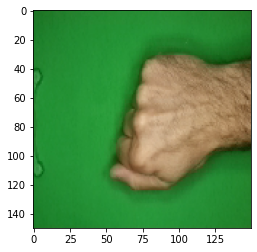

In [12]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper dong!!!')
  elif classes[0][1]==1:
    print('rock dong')
  elif classes[0][2]==1:
    print('scissors dong')
  else:
    print('Gambar tidak dikenali!!!')